<a href="https://colab.research.google.com/github/shirishph/covariate_shift_detect/blob/main/covariate_shift_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy

In [166]:
total_bins = 50

total_training_samples = 5000
train_min = 5
train_max = 8

total_test_samples_1 = 10
test_min = 5
test_max = 18

In [167]:
train = np.random.randint(train_min, train_max, total_training_samples)
train_dist_exemplar, train_bin_edges = np.histogram(train, bins=np.arange(total_bins), density=True)

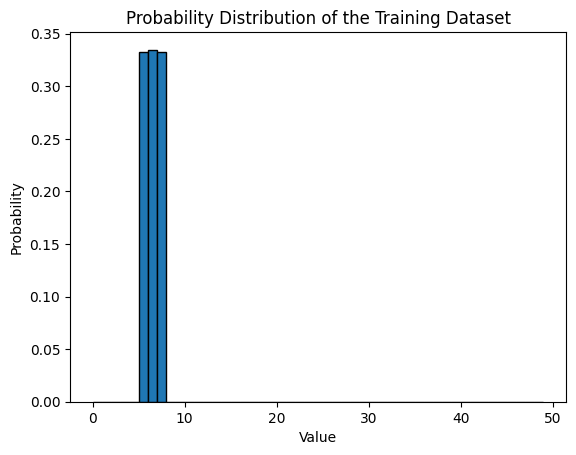

In [168]:
plt.hist(train, bins=np.arange(total_bins), density=True, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution of the Training Dataset')
plt.show()

In [169]:
test = np.random.randint(train_min, train_max, total_test_samples_1)
test = np.concatenate((test, np.random.randint(test_min, test_max, total_test_samples_1)), axis=0)
test = np.concatenate((test, np.random.randint(train_min, train_max, total_test_samples_1)), axis=0)
test = np.concatenate((test, np.random.randint(test_min, test_max, total_test_samples_1)), axis=0)
test_dist, test_bin_edges = np.histogram(test, bins=np.arange(total_bins), density=True)

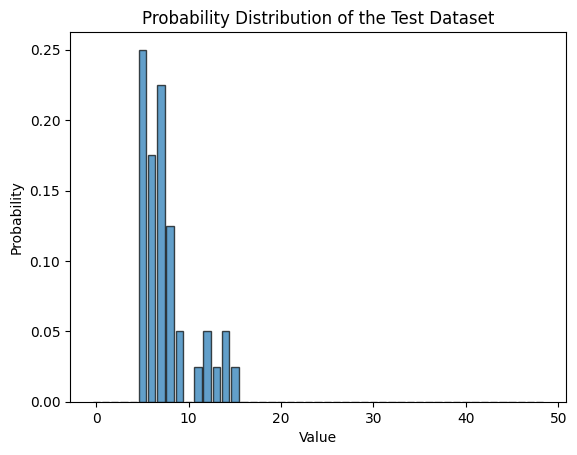

In [170]:
plt.bar(range(len(test_dist)), test_dist, edgecolor='k', alpha=0.7)
plt.title('Probability Distribution of the Test Dataset')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

In [171]:
# Calculate the Expected Value where the indices of the array are treated as outcomes and the values of the array are the probabilities
threshold = sum(i * train_dist_exemplar[i] for i in range(len(train_dist_exemplar)))
threshold = (threshold * 1.25)

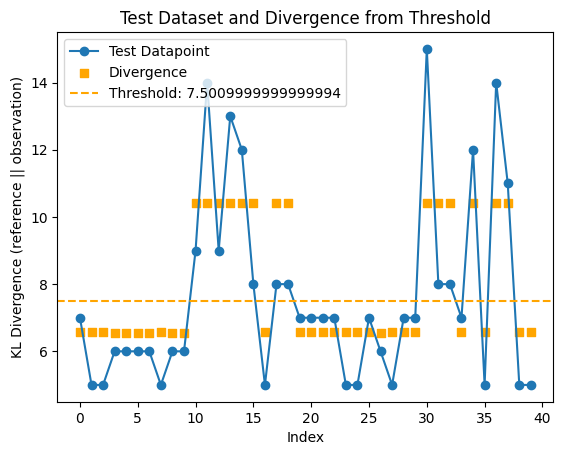

In [177]:
result = []
train_dist_exemplar[train_dist_exemplar<=0.0] = 0.00001 # Avoid divide by zero for KLD

for index, var in enumerate(test):
  var_dist, var_bin_edges = np.histogram(var, bins=np.arange(total_bins), density=True)
  var_dist[var_dist<=0.0] = 0.00001 # Avoid divide by zero for KLD

  # KL Divergence
  result.append(entropy(np.array(train_dist_exemplar), np.array(var_dist))) # (reference, observation)

# Plot the array
plt.plot(np.array(test), label="Test Datapoint", marker='o')
plt.scatter(range(len(test)), np.array(result), label="Divergence", marker='s', color='orange')

# Add the labels and title
plt.axhline(y=threshold, color='orange', linestyle='--', label='Threshold: ' + str(threshold))
plt.xlabel('Index')
plt.ylabel('KL Divergence (reference || observation)')
plt.title('Test Dataset and Divergence from Threshold')

# Add a legend
plt.legend()

# Show the plot
plt.show()